# EDA - Walmark Store Sale Dataset

### Problem Statement

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

### Dataset Description
This is the historical data that covers sales from 2010–02–05 to 2012–11–01, in the file Walmart_Store_sales. Within this file you will find the following fields:

* Store — the store number
* Date — the week of sales
* Weekly_Sales — sales for the given store
* Holiday_Flag — whether the week is a special holiday week 1 — Holiday week 0 — Non-holiday week
* Temperature — Temperature on the day of sale
* Fuel_Price — Cost of fuel in the region
* CPI — Prevailing consumer price index
* Unemployment — Prevailing unemployment rate

### Holiday Events
* Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
* Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
* Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
* Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


[Download Dataset Here](https://drive.google.com/open?id=1alDWzg16PJmq_W33ySIv-RqpUjvTRU9U)

### Analysis Tasks
Basic Statistics tasks
* Which store has maximum sales
* Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out co-efficient of variance
* Which store/s has good quarterly growth rate in Q3’2012
* Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
* Provide a monthly and semester view of sales in units and give insights

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.shape

(6435, 8)

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.max()

Store                   45
Date            31-12-2010
Weekly_Sales    3818686.45
Holiday_Flag             1
Temperature         100.14
Fuel_Price           4.468
CPI             227.232807
Unemployment        14.313
dtype: object

#### Question 1: Which store has maximum sales?

In [6]:
df.loc[df['Weekly_Sales'] == df['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


From this we see that Store 14 has the maximum weekly sales.

#### Question 2: Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of variance (CoV)?

In simple terms CoV is ratio of standard deviation to the mean.

In [7]:
# here i am grouping by store and finding the standard deviation and mean of each store.
maxstd = pd.DataFrame(df.groupby('Store').agg({'Weekly_Sales':['std','mean']}))

# just resetting the index.
maxstd = maxstd.reset_index()

# now we know that CoV is std/ mean we are doing this for each store.
maxstd['CoV'] = (maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')]) *100

# finding the store with maximum standard deviation.
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

From this we can conclude that sales in store 14 vary a lot.

#### Question 3: Which store/s has good quarterly growth rate in Q3’2012?

In [8]:
# converting the data type of date column to dateTime 
df['Date'] = pd.to_datetime(df['Date'])

# defining the start and end date of Q3 and Q2
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))

# collecting the data of Q3 and Q2 from original dataset.
Q2data = df[(df['Date'] > Q2_date_from) & (df['Date'] < Q2_date_to)]
Q3data = df[(df['Date'] > Q3_date_from) & (df['Date'] < Q3_date_to)]

# finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)

# finding the sum weekly sales of each store in Q2
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)

# mergeing Q2 and Q3 data on Store as a common column
Q3_Growth = Q2.merge(Q3,how='inner',on='Store')

In [9]:
# calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] = (Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate'] = round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [10]:
Q3_Growth.sort_values('Growth_Rate', ascending=False).tail(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


From above tables we can infer that Q3 growth rate is in losses.

The Store 16 has the least loss of 3% compared the other stores and store 14 has highest loss of 18%.

#### Question 4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [11]:
# finding the mean sales of non holiday and holiday 
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [12]:
# marking the holiday dates 
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )

# calculating the mean sales during the holidays
Christmas_mean_sales=df[(df['Date'] == Christmas1) | (df['Date'] == Christmas2) | (df['Date'] == Christmas3) | (df['Date'] == Christmas4)]
Thanksgiving_mean_sales=df[(df['Date'] == Thanksgiving1) | (df['Date'] == Thanksgiving2) | (df['Date'] == Thanksgiving3) | (df['Date'] == Thanksgiving4)]
LabourDay_mean_sales=df[(df['Date'] == LabourDay1) | (df['Date'] == LabourDay2) | (df['Date'] == LabourDay3) | (df['Date'] == LabourDay4)]
SuperBowl_mean_sales=df[(df['Date'] == SuperBowl1) | (df['Date'] == SuperBowl2) | (df['Date'] == SuperBowl3) | (df['Date'] == SuperBowl4)]

#
list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}
list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'Thanksgiving_mean_sales': 1471273.43,
 'LabourDay_mean_sales': 1008369.41,
 'SuperBowl_mean_sales': nan,
 'Non holiday weekly sales': 1041256.3802088564}

From this we can infer that the mean sales of thanks giving is more than the non holiday weekly sales.

#### Question 5: Provide a Monthly,Quaterly and Semester view of sales in units and give insights.

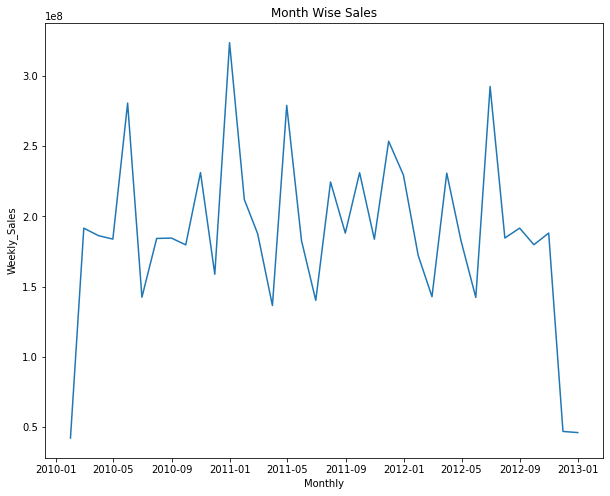

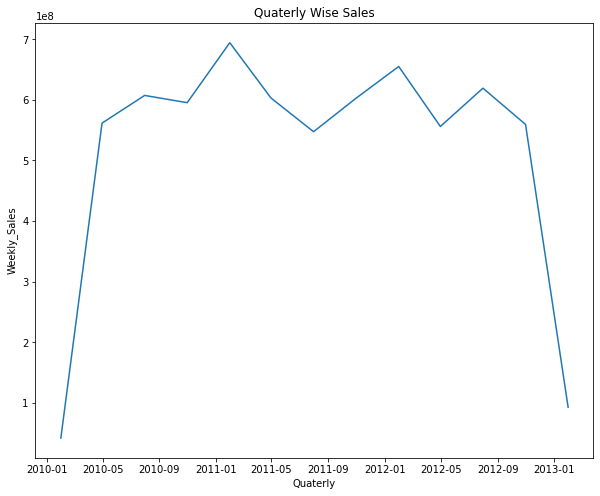

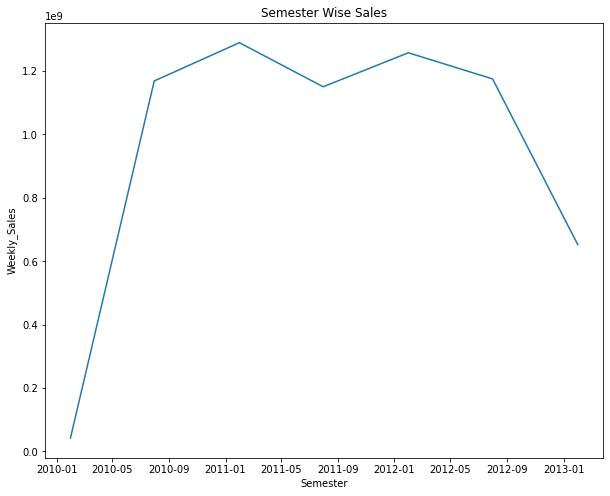

In [13]:
# monthly sales 
monthly = df.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')

# quaterly sales 
Quaterly = df.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')

# semester sales 
Semester = df.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')

plt.show()